In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def drawmu(x):
    data = np.loadtxt('/home/xiaodongli/projects/cf_pks/CITAData/subsamples/'+x)
    data = data.reshape(150,120,-1)
    ximu = data[6:40,:,2].sum(0)
    k = linspace(0,1,120)
    if x[63] == 'r':
        if x[67] == '1':
            a = 'snap = ' + x[7]+x[8]+x[9]+'   '+x[35]+'   '+'w=$\\rho^{-1}$'
        elif x[66] != '-':
            a = 'snap = ' + x[7]+x[8]+x[9]+'   '+x[35]+'   '+'w=$\\rho^{'+x[66]+x[67]+x[68]+'}$'
        else: 
            a = 'snap = ' + x[7]+x[8]+x[9]+'   '+x[35]+'   '+'w=$\\rho^{'+x[66]+x[67]+x[68]+x[69]+'}$'
    else:
        a = 'snap = ' + x[7]+x[8]+x[9]+'   '+x[35]+'   '+'w=$\\rho^{1}$'
    plt.plot(1-k,ximu, label = a)
    plt.xlabel('1-mu')
    plt.ylabel('ximu')
    plt.legend()

def draws(x):
    data=np.loadtxt('/home/xiaodongli/projects/cf_pks/CITAData/subsamples/'+x)
    f=open('/home/xiaodongli/projects/cf_pks/CITAData/subsamples/'+x, 'r')
    b = f.readline()
    DDnorm , DRnorm , RRnorm =  [float(b.split()[row]) for row in range(1,4)]
    data = data.reshape(150,120,-1)
    DDs ,DRs ,RRs = [data[:,:,row].sum(1) for row in [3,4,6]]
    DDs = DDs / DDnorm; DRs = DRs / DRnorm; RRs = RRs / RRnorm
    xi = (DDs - 2*DRs + RRs) / RRs
    s = linspace(0.5,149.5,150)
    if x[63] == 'r':
        if x[67] == '1':
            a = 'snap = ' + x[7]+x[8]+x[9]+'   '+x[35]+'   '+'w=$\\rho^{-1}$'
        elif x[66] != '-':
            a = 'snap = ' + x[7]+x[8]+x[9]+'   '+x[35]+'   '+'w=$\\rho^{'+x[66]+x[67]+x[68]+'}$'
        else: 
            a = 'snap = ' + x[7]+x[8]+x[9]+'   '+x[35]+'   '+'w=$\\rho^{'+x[66]+x[67]+x[68]+x[69]+'}$'
    else:
        a = 'snap = ' + x[7]+x[8]+x[9]+'   '+x[35]+'   '+'w=$\\rho^{1}$'
    plt.plot(s,s*s*xi,label = a)
    plt.xlabel('s')
    plt.ylabel('ximu')
    plt.legend()

In [139]:
data.dtype.type

numpy.float64

In [3]:
def drawmumean(x, mucut=-6):
    def normto1(X):
        return X[:mucut] / abs(mean(X[:mucut]))
   
    data = np.loadtxt('/home/xiaodongli/projects/cf_pks/CITAData/subsamples/'+x)
    data = data.reshape(150,120,-1)
    ximu = data[6:40,:,2].sum(0); ximu=normto1(ximu)
    k = linspace(0,1,120)
    k = k[-mucut:]
    if x[63] == 'r':
        if x[67] == '1':
            a = 'snap = ' + x[7]+x[8]+x[9]+'   '+x[35]+'   '+'w=$\\rho^{-1}$'
        elif x[66] != '-':
            a = 'snap = ' + x[7]+x[8]+x[9]+'   '+x[35]+'   '+'w=$\\rho^{'+x[66]+x[67]+x[68]+'}$'
        else: 
            a = 'snap = ' + x[7]+x[8]+x[9]+'   '+x[35]+'   '+'w=$\\rho^{'+x[66]+x[67]+x[68]+x[69]+'}$'
    else:
        a = 'snap = ' + x[7]+x[8]+x[9]+'   '+x[35]+'   '+'w=$\\rho^{1}$'
    plt.plot(1-k,ximu, label = a)
    plt.xlabel('1-mu[:'+str(mucut)+']')
    plt.ylabel('ximu[:'+str(mucut)+']')
    plt.legend()
    
def drawmu(snpid=None, rho_power=None, mucut=-6, filename=None, label=None, fig=None, ax1=None, ax2=None,
          simulation = 'cita'):
    if fig == None:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
    def normto1(X):
        return X[:mucut] / abs(mean(X[:mucut]))
    if filename == None:
        if simulation == 'cita':
            if rho_power == 0:
                filename = '/home/xiaodongli/projects/cf_pks/CITAData/subsamples/' +\
                'gadget_%03i'%snpid+'.rat0.0027_ranseed0.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf'
            else:
                filename = '/home/xiaodongli/projects/cf_pks/CITAData/subsamples/' +\
                'gadget_%03i'%snpid+\
                '.rat0.0027_ranseed0.shiftz.om0.2951_w-1.0000.radeczw.rho'+str(rho_power)+\
                '.150s0to150.120mu.zplus1000000000.2pcf'
        #elif simulation == 'cola':
            
    data = np.loadtxt(filename)
    data = data.reshape(150,120,-1)
    ximu = data[6:40,:,2].sum(0); 
    k = linspace(0,1,120)
    k = k[-mucut:]
    if label == None:
        label = 'snap = '+str(snpid)+', z = '+str((15-snpid)*0.1)+', w=$\\rho^{'+str(rho_power)+'}$'
    ax1.plot(1-k,ximu[:mucut], label = label); 
    ax2.plot(1-k,normto1(ximu[:mucut]), label = label)
    for ax in [ax1, ax2]:
        ax.set_xlabel('1-mu[:'+str(mucut)+']')
        ax.set_ylabel('ximu[:'+str(mucut)+']')
        ax.legend()
    return fig, ax1, ax2

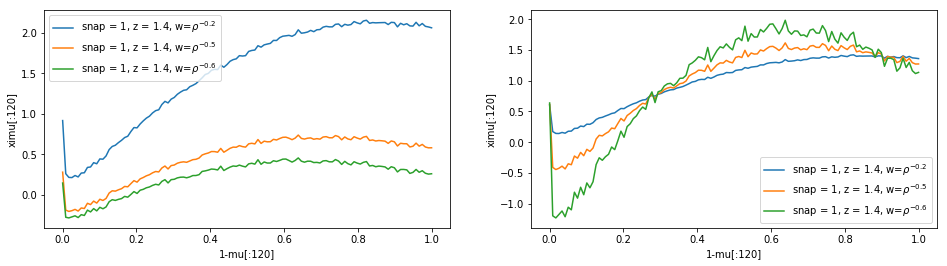

In [6]:
snpid = 1
mucut = 120
fig = ax1 = ax2 = None
for power in [-0.2, -0.5, -0.6,]:
    fig, ax1, ax2 = drawmu(snpid, power, mucut, fig=fig, ax1=ax1, ax2=ax2)

### w ~ rho ^ -0.1, -0.2, -0.3: reasonable result

##### with power decrease, amplitude, FoG, kaiser all decrease
##### after normalization: FoG decreased more than others,

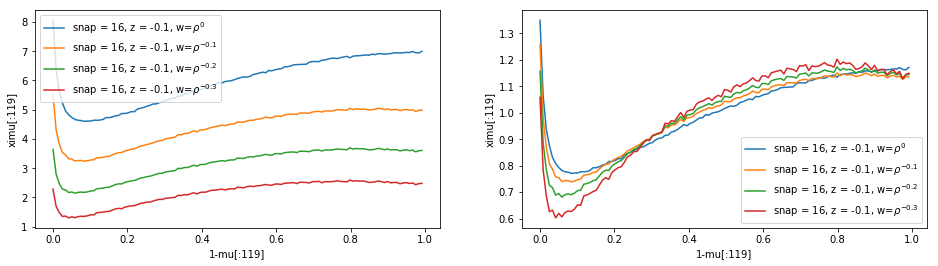

In [128]:
# We slightly cut the FoG by using 1-mu > 1/120
snpid = 16
mucut = 120-1

fig = ax1 = ax2 = None
for power in [0, -0.1, -0.2, -0.3]:
    fig, ax1, ax2 = drawmu(snpid, power, mucut, fig=fig, ax1=ax1, ax2=ax2)

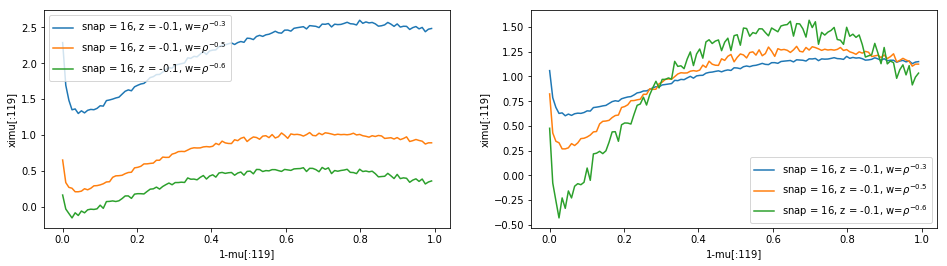

In [129]:
# We slightly cut the FoG by using 1-mu > 1/120
snpid = 16
mucut = 120-1

fig = ax1 = ax2 = None
for power in [-0.3, -0.5, -0.6]:
    fig, ax1, ax2 = drawmu(snpid, power, mucut, fig=fig, ax1=ax1, ax2=ax2)

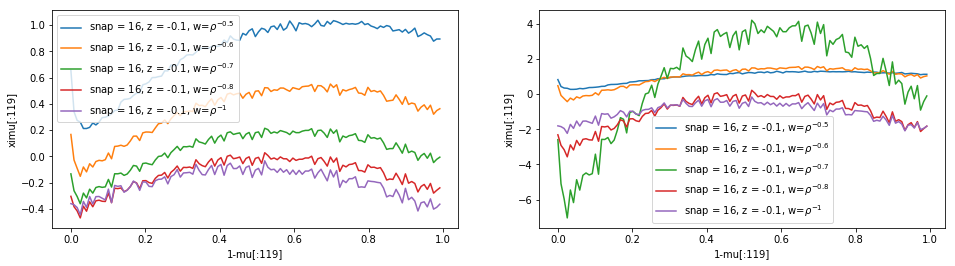

In [131]:
# We slightly cut the FoG by using 1-mu > 1/120
snpid = 16
mucut = 120-1

fig = ax1 = ax2 = None
for power in [-0.5, -0.6, -0.7, -0.8, -1]:
    fig, ax1, ax2 = drawmu(snpid, power, mucut, fig=fig, ax1=ax1, ax2=ax2)

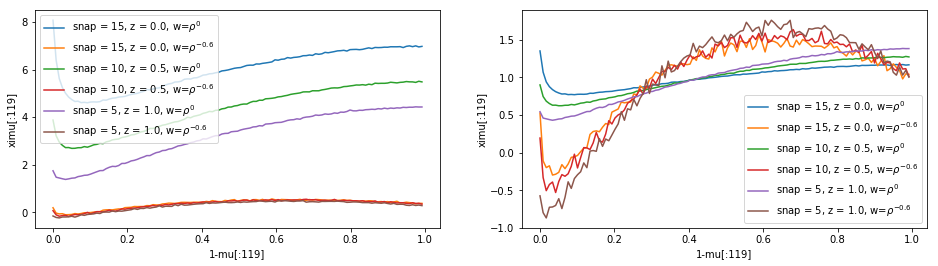

In [136]:
# We slightly cut the FoG by using 1-mu > 1/120
fig = ax1 = ax2 = None
for snpid in [15, 10, 5]:
    mucut = 120-1
    
    for power in [0, -0.6]:
        fig, ax1, ax2 = drawmu(snpid, power, mucut, fig=fig, ax1=ax1, ax2=ax2)

ValueError: x and y must have same first dimension, but have shapes (114,) and (120,)

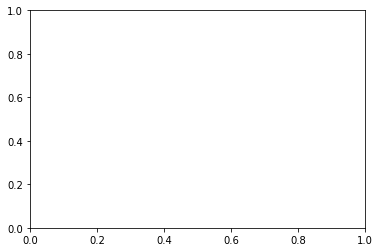

In [36]:
def normto1(X):
    return X[:-6] / mean(X[:-6])

k = linspace(0,1,120)
k = k[6:]

data=np.loadtxt('/home/yang/Desktop/cf_pks/CITAData/subsamples/gadget_001.rat0.0027_ranseed0.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf')
data = data.reshape(150,120,-1)
ximu = data[6:40,:,2].sum(0); ximu=normto1(ximu)
plt.plot(1-k,ximu, label = 'snap=001, w=$1$')

data=np.loadtxt('/home/yang/Desktop/cf_pks/CITAData/subsamples/gadget_001.rat0.0027_ranseed0.shiftz.om0.2951_w-1.0000.radeczw.rho-0.5.150s0to150.120mu.zplus1000000000.2pcf')
data = data.reshape(150,120,-1)
ximu = data[6:40,:,2].sum(0); ximu=normto1(ximu)

plt.plot(1-k,ximu, label = 'snap=001, w=$\\rho^{-0.5}$')

data=np.loadtxt('/home/yang/Desktop/cf_pks/CITAData/subsamples/gadget_001.rat0.0027_ranseed0.shiftz.om0.2951_w-1.0000.radeczw.rho-0.8.150s0to150.120mu.zplus1000000000.2pcf')
data = data.reshape(150,120,-1)
ximu = data[6:40,:,2].sum(0); ximu=normto1(ximu)
plt.plot(1-k,ximu, label = 'snap=001, w=$\\rho^{-0.8}$')

data=np.loadtxt('/home/yang/Desktop/cf_pks/CITAData/subsamples/gadget_001.rat0.0027_ranseed0.shiftz.om0.2951_w-1.0000.radeczw.rho-1.150s0to150.120mu.zplus1000000000.2pcf')
data = data.reshape(150,120,-1)
ximu = data[6:40,:,2].sum(0); ximu=normto1(ximu)
plt.plot(1-k,ximu, label ='snap=001, w=$\\rho^{-1}$')
plt.legend(frameon=False)


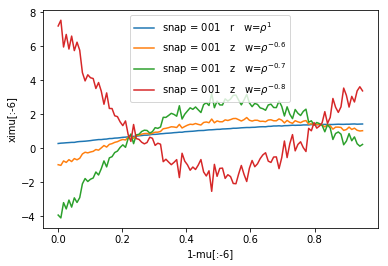

In [27]:
drawmumean('gadget_001.rat0.0027_ranseed0.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf')
drawmumean('gadget_001.rat0.0027_ranseed0.shiftz.om0.2951_w-1.0000.radeczw.rho-0.6.150s0to150.120mu.zplus1000000000.2pcf')
drawmumean('gadget_001.rat0.0027_ranseed0.shiftz.om0.2951_w-1.0000.radeczw.rho-0.7.150s0to150.120mu.zplus1000000000.2pcf')
drawmumean('gadget_001.rat0.0027_ranseed0.shiftz.om0.2951_w-1.0000.radeczw.rho-0.8.150s0to150.120mu.zplus1000000000.2pcf')